# Part 3: Data Analytics 

## Step 1: Crawl a real-world dataset

The data comes from the webset "https://www.worldometers.info/coronavirus/", the dataset at the bottom. The dataset is about COVID-19, it records the latest COVID-19 data of all the coutries in the world. Exclusively, It also records the population in each country.

**Today is 2021/12/28,So the figures below are as of December 28, 2021.** 

I'm interested in some of these variables: total diagnoses, total deaths, total cures, severe cases, population.

I used the Requests library, PyQuery, and CSV libraries.First, I read the page, because the site seemed to crawl backwards, so I used Request Headers. Read the source code of the web page and convert it to text format, find the source code where the data was I needed, analyze the format characteristics before and after it, and then extract the part of the content I need. Finally, the data was written to a CSV file.

In [4]:

import requests
from pyquery import PyQuery as pquery
import csv

Requesting access to html.

In [5]:

def getHtml():
    #Request URL
    url = "https://www.worldometers.info/coronavirus/"
    #Request headers
    headers = {
        'upgrade-insecure-requests': '1',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36',
    }
    #The GET mode requests web pages
    response = requests.request("GET", url, headers=headers)
    #return html in text format
    return response.text

Write into the CSV file.

In [6]:

def writeToCsv(filename, title, dataList):
    #open the CSV file
    #The file is read and written with newline='' 
    with open(filename, 'w', newline="", encoding="utf-8") as csvfile:
        #create CSV
        csvWriter = csv.writer(csvfile)
        #If there's data in the header
        if len(title)>0:
            #Written to the header
            csvWriter.writerow(title)
        #Iterate over the list of data
        for data in dataList:
            #Write data into CSV
            csvWriter.writerow(data)

Crawl web site, https://www.worldometers.info/coronavirus/

In [7]:
if __name__ == '__main__':
    

    #get html
    html = getHtml()
    #Define the header array
    title = []
    #Define an array of data lists
    dataList = []
    #Convert HTML to pQuery and parse the HTML string
    doc = pquery(html)
    #Delete the top hidden row and bottom statistics row of the table
    doc(".total_row_world").remove()
    doc(".body_continents").remove()
    doc(".total_row_body").remove()
    #Iterate over the table header, appending each item to the title array
    for r in doc('#main_table_countries_today thead tr th').items():
        #Gets the text of the current object
        #Removes Spaces at the beginning and end of strings
        colName = r.text().strip()
        #Append to the title array
        title.append(colName)
    #Output the header
    print(title)
    #Iterate over each row of the table, appending each row to the dataList array
    for r in doc('#main_table_countries_today tbody tr').items():
        #Define a data array to hold the contents of the current row
        data = []
        i = 0
        #Iterate over each TD, which is each cell
        for vr in r("td").items():
            i+=1
            #Gets the text of the current cell
            val = vr.text()
            #Print the first column sequence number
            if i==1:
                print(val)
            #Appends cell text to the data array
            data.append(val)
        #Append data array to dataList array
        dataList.append(data)

['#', 'Country,\nOther', 'Total\nCases', 'New\nCases', 'Total\nDeaths', 'New\nDeaths', 'Total\nRecovered', 'New\nRecovered', 'Active\nCases', 'Serious,\nCritical', 'Tot\xa0Cases/\n1M pop', 'Deaths/\n1M pop', 'Total\nTests', 'Tests/\n\n1M pop', 'Population', 'Continent', '1 Case\nevery X ppl', '1 Death\nevery X ppl', '1 Test\nevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop', 'Active Cases/1M pop']
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176

In [8]:
#Defining the name of the CSV file    
filename = "data.csv"
#write into CSV file
writeToCsv(filename, title, dataList)

## Step 2: Perform data preparation & cleaning

In [1]:
import pandas as pd
import matplotlib as plt

Load the dataset into a data frame using Pandas

In [79]:
df = pd.read_csv('data.csv')
df.head(5)

,#,"Country,\nOther",Total\nCases,New\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,New\nRecovered,Active\nCases,"Serious,\nCritical",...,Total\nTests,Tests/\n\n1M pop,Population,Continent,1 Case\nevery X ppl,1 Death\nevery X ppl,1 Test\nevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,1,USA,"54,114,264","+285,598","841,874","+1,694","41,280,181","+76,797","11,992,209","16,999",...,"805,233,686","2,411,694","333,887,143",North America,6,397,0.0,855,5.00,"35,917"
1,2,India,"34,808,067","+8,376","480,320",+30,"34,243,945","+6,450","83,802","8,944",...,"674,078,531","481,429","1,400,161,471",Asia,40,"2,915",2.0,6,0.02,60
2,3,Brazil,"22,254,706","+8,430","618,705",+130,"21,414,318",NaN,"221,683","8,318",...,"63,776,166","296,903","214,804,667",South America,10,347,3.0,39,0.60,"1,032"
3,4,UK,"12,338,676","+129,471","148,021",+18,"10,179,898","+53,242","2,010,757",842,...,"395,579,689","5,781,978","68,415,982",Europe,6,462,0.0,"1,892",0.30,"29,390"
4,5,Russia,"10,437,152","+21,922","306,090",+935,"9,337,447","+43,961","793,615","2,300",...,"239,000,000","1,636,678","146,027,482",Europe,14,477,1.0,150,6.00,"5,435"


Explore the number of rows & columns, ranges of values, etc.

view the list of columns in the data frame.

In [3]:
df.columns

Index(['#', 'Country,\nOther', 'Total\nCases', 'New\nCases', 'Total\nDeaths',
       'New\nDeaths', 'Total\nRecovered', 'New\nRecovered', 'Active\nCases',
       'Serious,\nCritical', 'Tot Cases/\n1M pop', 'Deaths/\n1M pop',
       'Total\nTests', 'Tests/\n\n1M pop', 'Population', 'Continent',
       '1 Case\nevery X ppl', '1 Death\nevery X ppl', '1 Test\nevery X ppl',
       'New Cases/1M pop', 'New Deaths/1M pop', 'Active Cases/1M pop'],
      dtype='object')

I choose the columns which I may use later.

In [4]:
selected_columns = ['Country,\nOther', 'Total\nCases','Total\nDeaths','Total\nRecovered','Active\nCases',
       'Serious,\nCritical','Deaths/\n1M pop','Population', 'Continent']
len(selected_columns)

9

In [5]:
df1 = df[selected_columns].copy()

Rename the columns to make them easy to remember.

In [88]:
df2=df1.rename(columns={'Country,\nOther':'Country','Total\nCases':'TotalCases','Total\nDeaths':'TotalDeaths',
                     'Total\nRecovered':'TotalRecovered','Active\nCases':'ActiveCases',
                     'Serious,\nCritical':'SeriousCases','Deaths/\n1M pop':'DeathsEvery1Mpop'})
#df2.set_index(["Country"], inplace=True)
df2

,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCases,DeathsEvery1Mpop,Population,Continent
0,USA,"54,114,264","841,874","41,280,181","11,992,209","16,999","2,521","333,887,143",North America
1,India,"34,808,067","480,320","34,243,945","83,802","8,944",343,"1,400,161,471",Asia
2,Brazil,"22,254,706","618,705","21,414,318","221,683","8,318","2,880","214,804,667",South America
3,UK,"12,338,676","148,021","10,179,898","2,010,757",842,"2,164","68,415,982",Europe
4,Russia,"10,437,152","306,090","9,337,447","793,615","2,300","2,096","146,027,482",Europe
...,...,...,...,...,...,...,...,...,...
219,Samoa,3,NaN,3,0,NaN,NaN,"200,373",Australia/Oceania
220,Saint Helena,2,NaN,2,0,NaN,NaN,"6,104",Africa
221,Micronesia,1,NaN,1,0,NaN,NaN,"116,814",Australia/Oceania
222,Tonga,1,NaN,1,0,NaN,NaN,"107,475",Australia/Oceania


In [89]:
df2.loc[0]['Country']='United States'
df2.loc[3]['Country']='United Kingdom'
df2.head(5)

,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCases,DeathsEvery1Mpop,Population,Continent
0,United States,"54,114,264","841,874","41,280,181","11,992,209","16,999","2,521","333,887,143",North America
1,India,"34,808,067","480,320","34,243,945","83,802","8,944",343,"1,400,161,471",Asia
2,Brazil,"22,254,706","618,705","21,414,318","221,683","8,318","2,880","214,804,667",South America
3,United Kingdom,"12,338,676","148,021","10,179,898","2,010,757",842,"2,164","68,415,982",Europe
4,Russia,"10,437,152","306,090","9,337,447","793,615","2,300","2,096","146,027,482",Europe


In [90]:
df2.shape

(224, 9)

In [91]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           224 non-null    object
 1   TotalCases        224 non-null    object
 2   TotalDeaths       212 non-null    object
 3   TotalRecovered    217 non-null    object
 4   ActiveCases       217 non-null    object
 5   SeriousCases      155 non-null    object
 6   DeathsEvery1Mpop  210 non-null    object
 7   Population        222 non-null    object
 8   Continent         222 non-null    object
dtypes: object(9)
memory usage: 15.9+ KB


Most columns have the data type object.I convert some other columns into numeric data types while ignoring any non-numeric value.

At first, I replace the commas.

In [92]:
for i in range(224):
    for j in range(9):
        if type(df2.iloc[i][j]) != float:
            df2.iloc[i][j]=df2.iloc[i][j].replace(',','')
df2

,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCases,DeathsEvery1Mpop,Population,Continent
0,United States,54114264,841874,41280181,11992209,16999,2521,333887143,North America
1,India,34808067,480320,34243945,83802,8944,343,1400161471,Asia
2,Brazil,22254706,618705,21414318,221683,8318,2880,214804667,South America
3,United Kingdom,12338676,148021,10179898,2010757,842,2164,68415982,Europe
4,Russia,10437152,306090,9337447,793615,2300,2096,146027482,Europe
...,...,...,...,...,...,...,...,...,...
219,Samoa,3,NaN,3,0,NaN,NaN,200373,Australia/Oceania
220,Saint Helena,2,NaN,2,0,NaN,NaN,6104,Africa
221,Micronesia,1,NaN,1,0,NaN,NaN,116814,Australia/Oceania
222,Tonga,1,NaN,1,0,NaN,NaN,107475,Australia/Oceania


Convert some other columns into numeric data types while ignoring any non-numeric value.

In [93]:
df2['TotalCases'] = pd.to_numeric(df2.TotalCases, errors='coerce')
df2['TotalDeaths'] = pd.to_numeric(df2.TotalDeaths, errors='coerce')
df2['TotalRecovered'] = pd.to_numeric(df2.TotalRecovered, errors='coerce')
df2['ActiveCases'] = pd.to_numeric(df2.ActiveCases, errors='coerce')
df2['SeriousCases'] = pd.to_numeric(df2.SeriousCases, errors='coerce')
df2['DeathsEvery1Mpop'] = pd.to_numeric(df2.DeathsEvery1Mpop, errors='coerce')
df2['Population'] = pd.to_numeric(df2.Population, errors='coerce')

Now, most columns have numeric data type.

In [94]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           224 non-null    object 
 1   TotalCases        224 non-null    int64  
 2   TotalDeaths       212 non-null    float64
 3   TotalRecovered    217 non-null    float64
 4   ActiveCases       217 non-null    float64
 5   SeriousCases      155 non-null    float64
 6   DeathsEvery1Mpop  210 non-null    float64
 7   Population        222 non-null    float64
 8   Continent         222 non-null    object 
dtypes: float64(6), int64(1), object(2)
memory usage: 15.9+ KB


We can see that there is missing data in 7 cloumns, except TotalCases.

Because this is panel data and COVID-19 data requires authenticity, I chose to deal with the missing values by deleting all rows with empty values.

In [95]:
df3 = df2.dropna(how='any',axis=0)
df3

,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCases,DeathsEvery1Mpop,Population,Continent
0,United States,54114264,841874.0,41280181.0,11992209.0,16999.0,2521.0,3.338871e+08,North America
1,India,34808067,480320.0,34243945.0,83802.0,8944.0,343.0,1.400161e+09,Asia
2,Brazil,22254706,618705.0,21414318.0,221683.0,8318.0,2880.0,2.148047e+08,South America
3,United Kingdom,12338676,148021.0,10179898.0,2010757.0,842.0,2164.0,6.841598e+07,Europe
4,Russia,10437152,306090.0,9337447.0,793615.0,2300.0,2096.0,1.460275e+08,Europe
...,...,...,...,...,...,...,...,...,...
194,Sint Maarten,4838,75.0,4627.0,136.0,10.0,1720.0,4.359900e+04,North America
195,Antigua and Barbuda,4259,118.0,4060.0,81.0,1.0,1190.0,9.913400e+04,North America
196,Saint Martin,4008,56.0,1399.0,2553.0,7.0,1413.0,3.964500e+04,North America
201,Saint Kitts and Nevis,2858,28.0,2776.0,54.0,1.0,521.0,5.375800e+04,North America


Check again to see if there are any missing values. It turns out there are no missing values.

In [96]:
df3.isnull().any()

Country             False
TotalCases          False
TotalDeaths         False
TotalRecovered      False
ActiveCases         False
SeriousCases        False
DeathsEvery1Mpop    False
Population          False
Continent           False
dtype: bool

As you can see, mortality data('DeathsEvery1Mpop') is already available in the original data set, which is a more scientific calculation than dividing the total number of deaths by the total number of confirmed cases, because the current number of deaths and the current total number of confirmed cases are not actually the same group.

In addition,let me add one more column and calculate the percentage of the population infected. 

In [97]:
df3['InfectPercent']=df3['TotalCases']/df3['Population']
df3.head(10)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCases,DeathsEvery1Mpop,Population,Continent,InfectPercent
0,United States,54114264,841874.0,41280181.0,11992209.0,16999.0,2521.0,3.338871e+08,North America,0.162074
1,India,34808067,480320.0,34243945.0,83802.0,8944.0,343.0,1.400161e+09,Asia,0.024860
2,Brazil,22254706,618705.0,21414318.0,221683.0,8318.0,2880.0,2.148047e+08,South America,0.103604
3,United Kingdom,12338676,148021.0,10179898.0,2010757.0,842.0,2164.0,6.841598e+07,Europe,0.180348
4,Russia,10437152,306090.0,9337447.0,793615.0,2300.0,2096.0,1.460275e+08,Europe,0.071474
5,Turkey,9365399,81917.0,8988852.0,294630.0,1128.0,956.0,8.568726e+07,Asia,0.109297
6,France,9326258,123188.0,7926033.0,1277037.0,3333.0,1881.0,6.548820e+07,Europe,0.142411
7,Germany,7058770,111752.0,6217800.0,729218.0,4636.0,1328.0,8.418213e+07,Europe,0.083851
8,Iran,6188857,131474.0,6030632.0,26751.0,2751.0,1536.0,8.558975e+07,Asia,0.072308
9,Spain,6032297,89253.0,5041873.0,901171.0,1736.0,1908.0,4.678170e+07,Europe,0.128946


Some basic statistics about numeric columns.

In [98]:
df3.describe()

,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCases,DeathsEvery1Mpop,Population,InfectPercent
count,1.500000e+02,150.000000,1.500000e+02,1.500000e+02,150.000000,150.000000,1.500000e+02,150.000000
mean,1.800415e+06,33070.126667,1.599871e+06,1.674747e+05,587.266667,1112.033333,4.637334e+07,0.078205
std,5.763416e+06,101131.492998,4.907776e+06,1.000247e+06,1884.668068,991.279015,1.675386e+08,0.064491
min,2.858000e+03,11.000000,1.040000e+02,4.500000e+01,1.000000,3.000000,3.367600e+04,0.000071
25%,4.781825e+04,650.750000,3.841500e+04,1.874000e+03,7.000000,197.000000,1.805720e+06,0.017112
50%,2.830680e+05,3967.000000,2.478870e+05,9.832500e+03,49.000000,918.000000,9.140686e+06,0.071862
75%,1.211488e+06,18778.500000,1.005762e+06,5.204200e+04,337.000000,1798.500000,3.388765e+07,0.122558
max,5.411426e+07,841874.000000,4.128018e+07,1.199221e+07,16999.000000,4462.000000,1.439324e+09,0.291030


Look at outbreaks on several continents by region.

In [99]:
data1 = df3.groupby(by='Continent',as_index=False).sum()
data1

,Continent,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCases,DeathsEvery1Mpop,Population,InfectPercent
0,Africa,8676111,209027.0,7806850.0,660234.0,1801.0,10851.0,1.011535e+09,0.614996
1,Asia,75949495,1033119.0,73648119.0,1268257.0,28831.0,16645.0,4.191414e+09,1.920105
2,Australia/Oceania,386030,3123.0,299838.0,83069.0,172.0,1129.0,4.042966e+07,0.062999
3,Europe,83657704,1488989.0,72585712.0,9583003.0,22755.0,83615.0,7.333458e+08,6.125260
4,North America,64111367,1237691.0,49923055.0,12950621.0,22679.0,32437.0,5.768925e+08,2.025751
5,South America,37281606,988570.0,35717010.0,576026.0,11852.0,22128.0,4.023829e+08,0.981657


The United States now has the highest total number of confirmed cases.

In [100]:
df2['TotalCases'].rank(ascending=False)

0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
       ...  
219    221.0
220    222.0
221    223.5
222    223.5
223    114.0
Name: TotalCases, Length: 224, dtype: float64

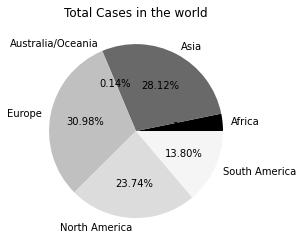

In [120]:
import matplotlib.pyplot as plt
labels=['Africa','Asia','Australia/Oceania','Europe','North America','South America']
X=[8676111,75949495,386030,83657704,64111367,37281606]  
colours=['black','dimgray','darkgrey','silver','gainsboro','whitesmoke']

plt.pie(X,labels=labels,autopct='%1.2f%%',colors=colours) 
plt.title("Total Cases in the world")
  

plt.show()  
#plt.savefig("PieChart.jpg")


## Step 3: Perform exploratory analysis and ask questions

#### Q1:  Which countries have high rates of death and severe illness? What can we learn from this phenomenon?

In [101]:
df3.sort_values('DeathsEvery1Mpop',ascending=False).head(10)

,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCases,DeathsEvery1Mpop,Population,Continent,InfectPercent
49,Bulgaria,737233,30657.0,608448.0,98128.0,481.0,4462.0,6870669.0,Europe,0.107301
39,Hungary,1246689,38894.0,1091017.0,116778.0,374.0,4041.0,9623883.0,Europe,0.129541
102,Montenegro,165074,2398.0,158332.0,4344.0,60.0,3817.0,628184.0,Europe,0.262780
21,Czechia,2454645,35911.0,2286187.0,132547.0,687.0,3344.0,10738512.0,Europe,0.228583
27,Romania,1804455,58642.0,1734715.0,11098.0,393.0,3079.0,19046874.0,Europe,0.094738
54,Croatia,697952,12425.0,667186.0,18341.0,238.0,3055.0,4067625.0,Europe,0.171587
46,Slovakia,831093,16486.0,765544.0,49063.0,485.0,3017.0,5463573.0,Europe,0.152115
178,Gibraltar,8297,100.0,7559.0,638.0,2.0,2969.0,33676.0,Europe,0.246377
2,Brazil,22254706,618705.0,21414318.0,221683.0,8318.0,2880.0,214804667.0,South America,0.103604
180,San Marino,7655,98.0,6725.0,832.0,6.0,2879.0,34037.0,Europe,0.224902


In [102]:
df3['SeriousCPercent']=df3['SeriousCases']/df3['TotalCases']
df3.sort_values('SeriousCPercent',ascending=False).head(10)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCases,DeathsEvery1Mpop,Population,Continent,InfectPercent,SeriousCPercent
103,Afghanistan,157998,7355.0,145527.0,5116.0,1124.0,183.0,40229267.0,Asia,0.003927,0.007114
30,Vietnam,1680985,31632.0,1264282.0,385071.0,7103.0,321.0,98639835.0,Asia,0.017042,0.004225
187,Liechtenstein,5982,69.0,5637.0,276.0,14.0,1802.0,38291.0,Europe,0.156225,0.002340
176,Yemen,10123,1984.0,7014.0,1125.0,23.0,64.0,30800760.0,Asia,0.000329,0.002272
194,Sint Maarten,4838,75.0,4627.0,136.0,10.0,1720.0,43599.0,North America,0.110966,0.002067
167,New Zealand,13932,50.0,12548.0,1334.0,26.0,10.0,5002100.0,Australia/Oceania,0.002785,0.001866
57,S. Korea,615532,5346.0,500273.0,109913.0,1078.0,104.0,51334773.0,Asia,0.011991,0.001751
196,Saint Martin,4008,56.0,1399.0,2553.0,7.0,1413.0,39645.0,North America,0.101097,0.001747
140,Guinea,31238,389.0,29804.0,1045.0,49.0,28.0,13661130.0,Africa,0.002287,0.001569
69,Venezuela,443612,5316.0,432297.0,5999.0,681.0,188.0,28316156.0,South America,0.015666,0.001535


We can see that the high fatality rate is mainly in small countries, which may be caused by insufficient medical resources. And the high rates of severe illness are also in small countries. Top of the list is Afghanistan in Asia, probably because of political instability, inadequate medical resources and poor living conditions.

#### Q2:Visualize the total number of confirmed cases and analyze the results. 

In [103]:
import pyecharts.options as opts
from pyecharts.charts import Map


In [105]:
data_list = list(zip(df2['Country'].values.tolist(),df2['TotalCases'].values.tolist()))
def map_world() -> Map:
    c=(
        Map()
        .add(series_name="TotalCases",data_pair=data_list,maptype='world')
        .set_global_opts(
            title_opts=opts.TitleOpts(title="The outbreak map"),
            visualmap_opts=opts.VisualMapOpts(is_piecewise=True,
                        pieces=[{"max": 10000, "min": 0,"label": "0-10k", "color": "#FFE4E1"},
                                {"max": 100000, "min": 10001, "label": "10k-100k", "color": "#FF7F50"},
                                {"max": 1000000, "min": 100001, "label": "100k-1m", "color": "#F08080"},
                                {"max": 10000000, "min": 1000001, "label": "1m-10m", "color": "#CD5C5C"},
                                {"max": 1000000000, "min": 10000001, "label": ">=10m", "color": "#990000"}]
                                    )
        )
    )
    return c
d_map=map_world()
d_map.render_notebook()

From this map, we can see very clearly that the United States, the United Kingdom, Brazil, And Russia are all very affected places.

#### Q3:By continent, if population is more, cases will be more?

In [106]:
data1 = df3.groupby(by='Continent',as_index=False).sum()
data1

,Continent,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCases,DeathsEvery1Mpop,Population,InfectPercent,SeriousCPercent
0,Africa,8676111,209027.0,7806850.0,660234.0,1801.0,10851.0,1.011535e+09,0.614996,0.010210
1,Asia,75949495,1033119.0,73648119.0,1268257.0,28831.0,16645.0,4.191414e+09,1.920105,0.022816
2,Australia/Oceania,386030,3123.0,299838.0,83069.0,172.0,1129.0,4.042966e+07,0.062999,0.002793
3,Europe,83657704,1488989.0,72585712.0,9583003.0,22755.0,83615.0,7.333458e+08,6.125260,0.016309
4,North America,64111367,1237691.0,49923055.0,12950621.0,22679.0,32437.0,5.768925e+08,2.025751,0.011567
5,South America,37281606,988570.0,35717010.0,576026.0,11852.0,22128.0,4.023829e+08,0.981657,0.004746


In [108]:
del data1['InfectPercent']
del data1['SeriousCPercent']
del data1['DeathsEvery1Mpop']
data1


,Continent,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCases,Population
0,Africa,8676111,209027.0,7806850.0,660234.0,1801.0,1.011535e+09
1,Asia,75949495,1033119.0,73648119.0,1268257.0,28831.0,4.191414e+09
2,Australia/Oceania,386030,3123.0,299838.0,83069.0,172.0,4.042966e+07
3,Europe,83657704,1488989.0,72585712.0,9583003.0,22755.0,7.333458e+08
4,North America,64111367,1237691.0,49923055.0,12950621.0,22679.0,5.768925e+08
5,South America,37281606,988570.0,35717010.0,576026.0,11852.0,4.023829e+08


In [160]:
data1['DeathRates']=data1['TotalDeaths']/data1['TotalCases']
data1['InfecetRates']=data1['TotalCases']/data1['Population']
data1['RecoveredRates']=data1['TotalRecovered']/data1['TotalCases']
data1

,Continent,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCases,Population,DeathRates,InfecetRates,RecoveredRates
0,Africa,8676111,209027.0,7806850.0,660234.0,1801.0,1.011535e+09,0.024092,0.008577,0.899810
1,Asia,75949495,1033119.0,73648119.0,1268257.0,28831.0,4.191414e+09,0.013603,0.018120,0.969699
2,Australia/Oceania,386030,3123.0,299838.0,83069.0,172.0,4.042966e+07,0.008090,0.009548,0.776722
3,Europe,83657704,1488989.0,72585712.0,9583003.0,22755.0,7.333458e+08,0.017799,0.114077,0.867651
4,North America,64111367,1237691.0,49923055.0,12950621.0,22679.0,5.768925e+08,0.019305,0.111132,0.778693
5,South America,37281606,988570.0,35717010.0,576026.0,11852.0,4.023829e+08,0.026516,0.092652,0.958033


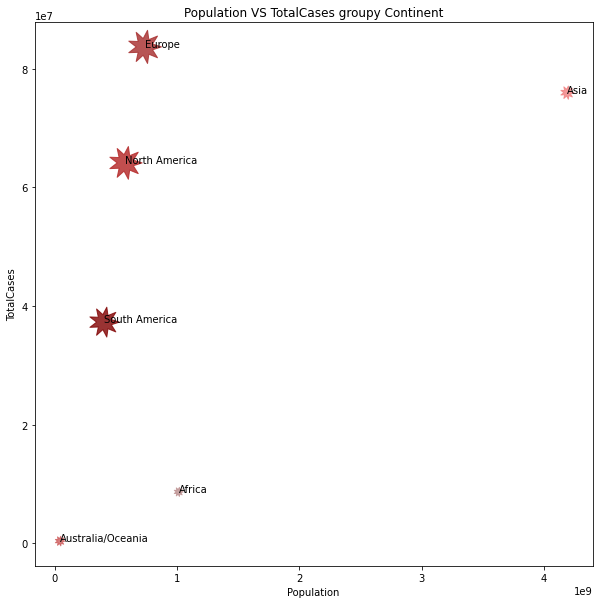

In [157]:
plt.figure(figsize=(10,10))
colours=['rosybrown','lightcoral','indianred','brown','firebrick','maroon']
plt.scatter(data1.Population,data1.TotalCases, s=(data1.InfecetRates)*10000,alpha=0.8,c=colours,marker=(9,1, 30))
plt.xlabel('Population')
plt.ylabel('TotalCases')
plt.title('Population VS TotalCases groupy Continent')
name=['Africa','Asia','Australia/Oceania','Europe','North America','South America']
for i in range(len(data1.Population)):
    plt.text(data1.Population[i],data1.TotalCases[i],name[i])
plt.show()

As we can see from the scatter chart, it is not the case that a place with a larger population has a higher number of confirmed cases. In Asia, where the population is the largest, the number of confirmed cases is relatively small. In contrast, Europe and the Americas have fewer people and more diagnoses. 

As we know, most Asian countries are more traditional, especially China, which will impose quarantine measures, which may be helpful to control the COVID-19, but at the same time, people often feel anxious and panic, because they will lose their freedom all the time. In the West, it is the opposite. Under different policies, people are more free. 

All in all,The extent of COVID-19 infection is not particularly related to population, but related to local habits and policies.

**I respect each country's culture and position.I'm not saying which's better or worse.NO OFFENCE,NO OFFENCE, NO OFFENCE.**

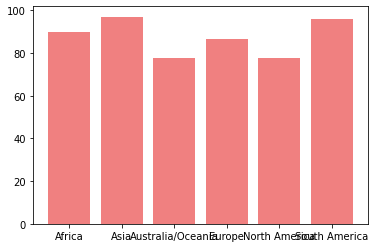

In [161]:
plt.figure()
plt.bar(data1.Continent,(data1.RecoveredRates)*100,color='lightcoral', label='Population')
#plt.bar(data1.Continent,data1.TotalDeaths, color='g', label='TotalCases')
plt.show()  